In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [12]:
df.shape

(16, 4)

In [3]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [4]:
df['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [5]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [6]:
df['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [8]:
X=df.drop(['salary_more_then_100k'],axis=1)
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
X['Company']=encoder.fit_transform(X['company'])
X['Job']=encoder.fit_transform(X['job'])
X['Degree']=encoder.fit_transform(X['degree'])
X.head(20)

,company,job,degree,Company,Job,Degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [13]:
X=X.drop(['company','job','degree'],axis=1)
X.head()

,Company,Job,Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [15]:
y=df['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [16]:
model.fit(X,y)

DecisionTreeClassifier()

In [17]:
model.score(X,y)

1.0

In [18]:
from sklearn.tree import plot_tree

[Text(0.4166666666666667, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = Salary above 100K'),
 Text(0.25, 0.75, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Salary below 100K'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Salary below 100K'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Salary below 100K'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Salary above 100K'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Salary below 100K'),
 Text(0.5833333333333334, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = Salary above 100K'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Salary above 100K'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\n

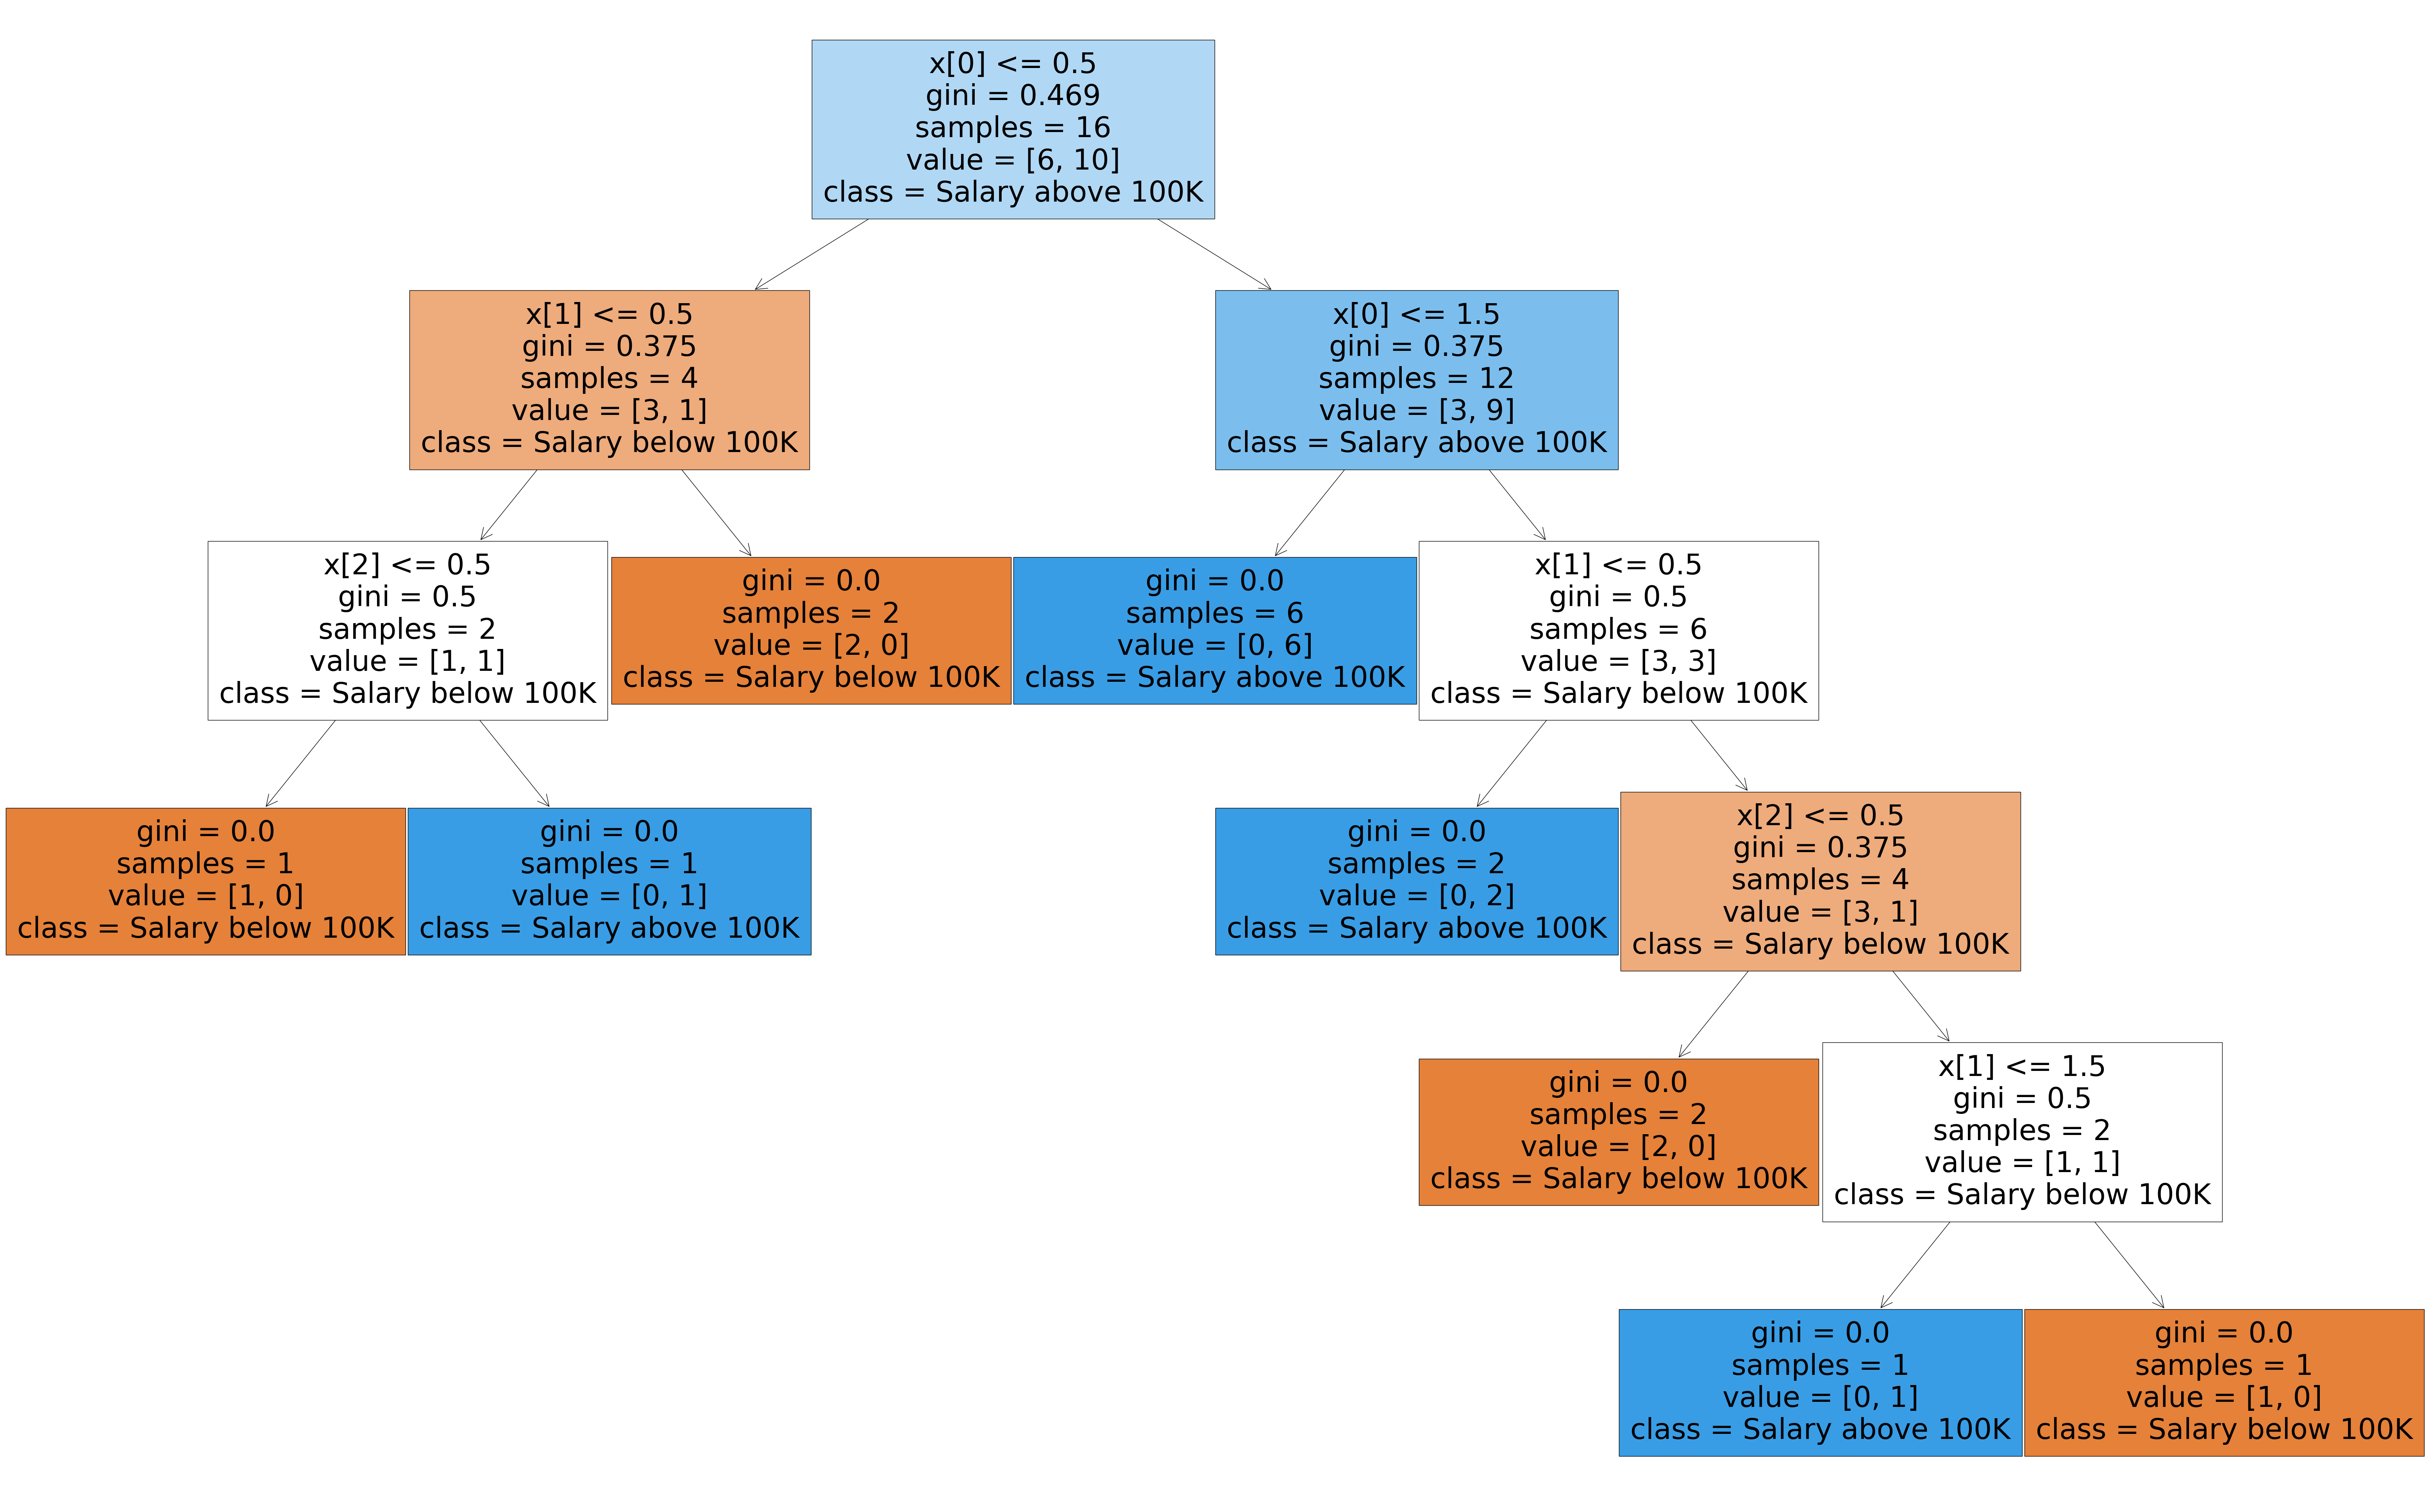

In [24]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(model,filled=True,class_names=['Salary below 100K','Salary above 100K'])

In [25]:
model.predict([[2,1,0]])

/Users/manojpoudel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])